--- 1. Loading and Inspecting Data ---
Dataset loaded successfully!

--- 2. Building Linear Regression Model (Predicting ERA) ---
R-squared: 0.6764
Root Mean Squared Error (RMSE): 2.3999

Impact of Each Stat on ERA (Coefficients):
      Coefficient
WAR     -0.227168
SO9     -0.288700
HR9      0.821532
WHIP     3.771701
--------------------------------------------------


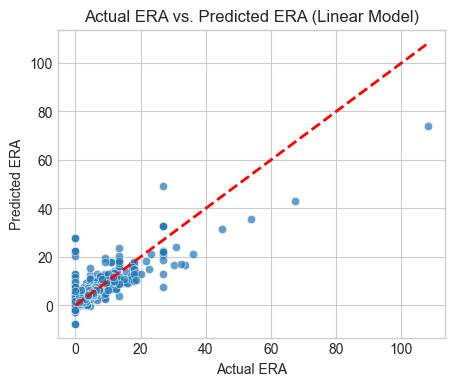


Analysis complete.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

def load_and_inspect_data(file_path):
    print("--- 1. Loading and Inspecting Data ---")
    try:
        df = pd.read_csv(file_path, header=0)
        print("Dataset loaded successfully!")
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return None

def perform_linear_regression_analysis(df):
    print("\n--- 2. Building Linear Regression Model (Predicting ERA) ---")
    
    # --- 1. Data Preparation ---
    df_cleaned = df.copy()
    
    # --- CHANGED: Feature Engineering ---
    # Calculate rate-based stats and handle potential division by zero
    df_cleaned['SO9'] = (df_cleaned['SO'] / df_cleaned['IP'] * 9).replace([np.inf, -np.inf], 0).fillna(0)
    df_cleaned['HR9'] = (df_cleaned['HR'] / df_cleaned['IP'] * 9).replace([np.inf, -np.inf], 0).fillna(0)
    
    # --- CHANGED: Update the feature list ---
    # Replace raw counts (IP, SO, BB) with their rate-based equivalents
    reg_features = ['WAR', 'SO9', 'HR9', 'WHIP'] 
    reg_target = 'ERA'
    
    model_df = df_cleaned[reg_features + [reg_target]].copy()

    imputer = SimpleImputer(strategy='median')
    model_df[reg_features] = imputer.fit_transform(model_df[reg_features])
    
    model_df.dropna(subset=[reg_target], inplace=True)

    X = model_df[reg_features]
    y = model_df[reg_target]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # --- 2. Model Training with Linear Regression ---
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # --- 3. Evaluation and Interpretation ---
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"R-squared: {r2:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    
    coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
    
    print("\nImpact of Each Stat on ERA (Coefficients):")
    print(coefficients)
    print("-" * 50)

    # --- 4. Visualization ---
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.title('Actual ERA vs. Predicted ERA (Linear Model)')
    plt.xlabel('Actual ERA')
    plt.ylabel('Predicted ERA')
    plt.show()

# --- Main execution block ---
if __name__ == '__main__':
    plt.style.use('seaborn-v0_8-whitegrid')
    
    file_path = 'C:/Users/frank/OneDrive/Documents/mlb_salaries_and_pitching_stats_2011-2024.csv'
    
    main_df = load_and_inspect_data(file_path)
    
    if main_df is not None:
        perform_linear_regression_analysis(main_df)
        print("\nAnalysis complete.")

In [4]:
import sys
print(sys.executable)

c:\Users\frank\AppData\Local\Programs\Python\Python310\python.exe
